In [30]:
%matplotlib inline
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
from scipy.stats import *


# The Gaussian (Normal) Distribution
The bell curve! It has two parameters, mean and variance, which completely parametrize it.

$$
N(x|\mu,\sigma) = \frac 1 {\sqrt{2 \pi \sigma^2}} exp^{\frac {-{(x-\mu)}^2} {2\sigma^2}}
$$

Further notation: $X \sim N(\mu, \sigma)$ indicates $p(X=x) = N(x|\mu,\sigma)$

The <strong>precision</strong> of a Gaussian distribution $\lambda = \frac 1 {\sigma^2}$is the inverse of its variance, and therefore measures how tight its variance is around its mean.

Its cumulative density function (CDF) is defined as follows:

$$
\Phi(x;\mu,\sigma) = \int_{-\infty}^x N(x|\mu,\sigma^2)dx
$$

Core reasons Gaussian distributions are widely used in statistics and machine learning:
- It is completely described by two intuitive parameters
- By the Central Limit Theorem, sums of independent random variables are approximately Gaussian, making Gaussians natural choices for modeling uncertainty (noise).
- It has maximum entropy (because it makes the least amount of assumptions) subject to having a specified mean and variance, which makes it a good "default choice."
- Its computation is closed-form and straight-forward.

# The Student t Distribution
One issue with the Gaussian distribution is that it is sensitive to outliers: the log-probability only decays quadratically with distance from the mean. This means that fitting data to a Gaussian can be brittle, as the probability mass given to an outlier skews the fitting process's perception of what the true mean and variance is. <br/><br />
A more robust distribution in this sense is the Student t distribution:

$$
\tau(x|\mu,\sigma^2,\upsilon) \propto [{1 + \frac 1 \upsilon ({\frac {x-\mu} \sigma}^2)}]^{-(\frac {\upsilon + 1} 2)} \\
\begin{align}
    mean &:\ \mu \\
    variance &: \sigma^2 (\frac \upsilon {\upsilon - 2})
\end{align}
$$

Here, $\sigma$ is a scale parameter and $\upsilon$ > 0 is the number of degrees of freedom.

# The Laplace Distribution
Another robust, long-tailed distribution is the Laplace distribution, which is also known as the double-sided exponential distribution. This name is apparent through the definition:

$$
Lap(x | \mu, b) = \frac 1 {2b} exp^({-\frac {|x - \mu|} b}) \\
\begin{align}
    mean &: \mu \\
    mode &: \mu \\
    var  &: 2b^2
\end{align}
$$

$\mu$ is a location parameter (shift, mean,etc), and $b$ is a scale parameter.

There are two key ways in which you might prefer a Laplace distribution over a Gaussian distribution:
- It is less robust to outliers in that its fatter tails (compared to a Gaussian) are less affected by outlier data during fitting.
- It has more probability density at 0 than a Gaussian, which (in combination with the previous bullet) shows how this distribution encourages sparsity in a model.

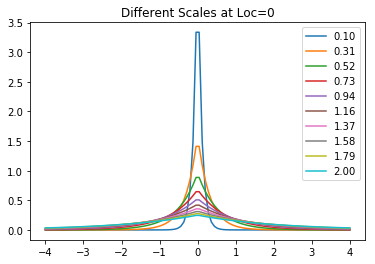

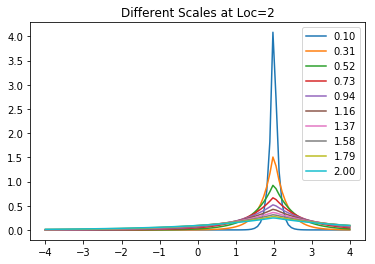

In [6]:
scales = np.linspace(1e-1, 2, 10)
x = np.linspace(-4, 4, 100)
for scale in scales:
    plt.figure(1)
    plt.plot(x, laplace.pdf(x, loc=0, scale=scale))

    plt.figure(2)
    plt.plot(x, laplace.pdf(x, loc=2, scale=scale))
    
plt.figure(1)
plt.title("Different Scales at Loc=0")
legend = map(lambda x: "{:.2f}".format(x), scales)
plt.legend(legend)

plt.figure(2)
plt.title("Different Scales at Loc=2")
plt.legend(legend)
    

The plots above show how the scale parameter, which can also be considered as a <i>precision</i> parameter $\frac 1 b$, controls the width of the distribution. Smaller values of $b$ (higher values of $\frac 1 b$) lead to distances from the mode $|x - \mu|$ being de-emphasized more, leading to a much narrower width. The location parameter $\mu$ simply indicates the constant location shift to apply.

### Comparing the Gaussian, Student t, and Laplace Distributions
TODO
TODO
TODO

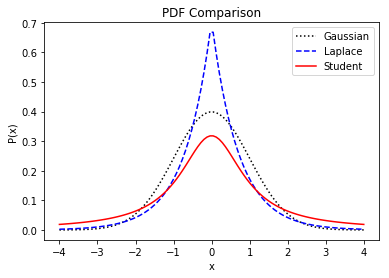

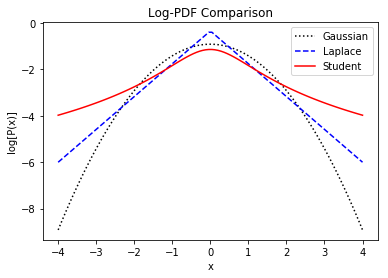

In [7]:
x = np.linspace(-4, 4, 100)
d_norm = norm.pdf(x, loc=0, scale=1)
d_lapl = laplace.pdf(x, loc=0, scale=1./np.sqrt(2))
d_t = t.pdf(x, df=1, loc=0, scale=1)

plt.plot(x, d_norm, 'k:')
plt.plot(x, d_lapl, 'b--')
plt.plot(x, d_t, 'r-')
plt.legend(("Gaussian", "Laplace", "Student"))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title("PDF Comparison")

plt.figure()
plt.plot(x, np.log(d_norm), 'k:')
plt.plot(x, np.log(d_lapl), 'b--')
plt.plot(x, np.log(d_t), 'r-')
plt.legend(("Gaussian", "Laplace", "Student"))
plt.xlabel('x')
plt.ylabel('log[P(x)]')
plt.title("Log-PDF Comparison")


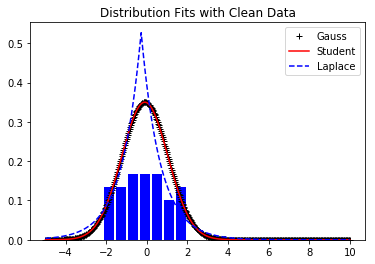

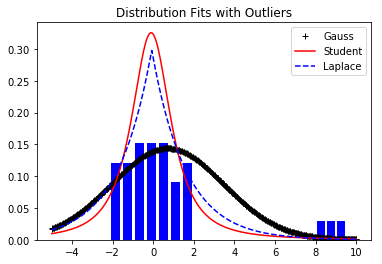

In [8]:
def fit_to_data(x, data):
    # fit a Gaussian distribution to the data over the domain x
    loc, scale = norm.fit(data)
    n = norm.pdf(x, loc=loc, scale=scale)

    # fit a Laplace distribution to the data over the domain x
    loc, scale = laplace.fit(data)
    l = laplace.pdf(x, loc=loc, scale=scale)

    # fit a Student distribution to the data over the domain x
    fd, loc, scale = t.fit(data)
    s = t.pdf(x, fd, loc=loc, scale=scale)
    
    return n, l, s


def plot_data(x, n_dist, l_dist, t_dist):
    plt.plot(
        x, n_dist, 'k+',
        x, t_dist, 'r-',
        x, l_dist, 'b--'
    )
    plt.legend(('Gauss', 'Student', 'Laplace'))
    
    
data_without_outliers = np.random.randn(30)
outliers = np.array([8, 8.75, 9.5])
data_with_outliers = np.hstack((data_without_outliers, outliers))
x = np.linspace(-5, 10, 500)

# fit without outliers
fits = fit_to_data(x, data_without_outliers)
plot_data(x, *fits)
_ = plt.hist(data_without_outliers, 7, weights=[1. / 30] * 30, rwidth=0.8, color='b')
plt.title("Distribution Fits with Clean Data")

# add the outliers
fits = fit_to_data(x, data_with_outliers)
plt.figure()
plot_data(x, *fits)
_ = plt.hist(data_without_outliers, 7, weights=[1. / 33] * 30, rwidth=0.8, color='b')
_ = plt.hist(outliers, 3, weights=[1. / 33] * 3, rwidth=0.8, color='b')
plt.title("Distribution Fits with Outliers")



# The Gamma Distribution (and Special Cases)
The Gamma distribution might be best understood intuitively as a generalization of the exponential distribution. It is a distribution for real numbers x > 0.

$$
\begin{align}
Ga(x|shape=a, rate=b) &= \frac {b^a} {\Gamma(a)} x^{a-1} e^{-xb} \\
            \Gamma(x) &= \left \lbrace
                             \begin{array}{ll}
                                 \int_0^\infty u^{x-1}e^{-u}du & x\ continuous\\
                                 (x-1)! & x\ discrete
                             \end{array}
                         \right.
\end{align}
$$

Summary statistics

$$
\begin{align}
mean &= \frac a b \\
mode &=\frac {a-1} b \\
var  &= \frac a {b^2}
\end{align}
$$

Several distributions are just a special case of Gamma, namely the following:
* <strong>Exponential:</strong> $Expon(x|\lambda) = Ga(x|1,\lambda)$
  * Key point: describes the time difference between events in a Poisson process, which is a process in which events occur independently with rate $\lambda$.
* <strong>Erlang</strong> $Erlang(x|\lambda) = Ga(x|integer,\lambda)$
  * Key point: the distribution of the sum of independent exponential random variables with each having mean $\frac 1 \lambda$.
* <strong>Chi-Squared</strong> $\chi^2(x|\nu) = Ga(x|\frac \nu 2, \frac 1 2)$
  * Key point: the distribution of the sum of squared Gaussian random variables.

### 1. Exponential Distribution (a Gamma relative)
$$
\begin{align}
    Expon(x|\lambda) &= Ga(x|1,\lambda) \\
                     &= \frac {\lambda e^{-\lambda x}} {\int_0^\infty e^{-u}du} \\
                     &\sim \lambda e^{-\lambda x}
\end{align}
$$
The $shape$ parameter $a$ is fixed to 1, leaving the $rate$ parameter $\lambda$ to control the steepness of the probability density decay.

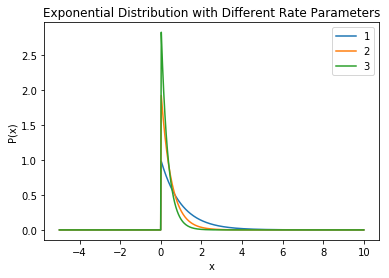

In [42]:
rates = np.arange(1, 4)
for rate in rates:
    plt.plot(x, expon.pdf(x, scale=1./rate))
plt.xlabel('x'); plt.ylabel('P(x)');
plt.title('Exponential Distribution with Different Rate Parameters')
plt.legend(rates)

### 2. The Erlang Distribution (a Gamma relative)
The Erlang distribution is a Gamma distribution where the shape parameter $a$ is an integer. A commonly used Erlang distribution is for $a=2$, known as the one-parameter Erlang distro:
$$
\begin{align}
    Erlang(x|\lambda) &= Ga(x|2,\lambda) \\
                     &= \lambda^2 x e^{-\lambda x}
\end{align}
$$

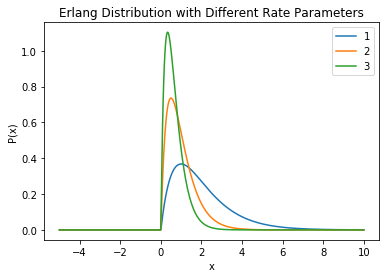

In [43]:
rates = np.arange(1, 4)
for rate in rates:
    plt.plot(x, gamma.pdf(x, a=2, scale=1./rate))
plt.xlabel('x'); plt.ylabel('P(x)');
plt.title('Erlang Distribution with Different Rate Parameters')
plt.legend(rates)

### 3. The Chi-squared Distribution (a Gamma relative)
The Chi-squared distribution is the Gamma distribution with $shape$ an integer multiple of $\frac 1 2$ and $rate$ of $\frac 1 2$. It is the distribution of the sum of squared Gaussian random variables e.g. $S \sim {\chi_\nu}^2$ for $S = \sum_{i=1}^\nu Z_i^2$ with each $Z_i \sim N(0, 1)$.

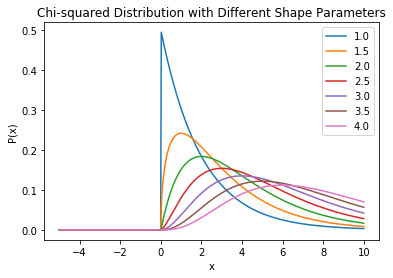

In [47]:
shapes = 0.5 * np.arange(2, 9)
for shape in shapes:
    plt.plot(x, gamma.pdf(x, a=shape, scale=2))
plt.xlabel('x'); plt.ylabel('P(x)');
plt.title('Chi-squared Distribution with Different Shape Parameters')
plt.legend(shapes)

## The Inverse Gamma Distribution
For a Gamma-distributed random variable $X \sim Ga(a,b)$ its inverse is distributed as $\frac 1 X \sim IG(a,b)$:

$$
IG(x|shape=a,scale=b) = \frac {b^a} {\Gamma(a)} x^{-(a+1)} e^{-\frac b x}
$$

$$
\begin{align}
mean &= \frac b {a-1} \\
mode &= \frac b {a+1} \\
var  &= \frac {b^2} {{(a-1)}^2 (a-2)} \\
\end{align}
$$

# The Beta Distribution
The Beta distribution has support over $[0,1]$, and supports many distribution shapes:

$$
\begin{align}
Beta(x|a,b) &= \frac 1 {B(a,b)} x^{a-1} {(1-x)}^{b-1} \\
     B(a,b) &= \frac {\Gamma(a) \Gamma(b)} {\Gamma(a, b)}
\end{align}
$$

Notable parameter combinations:
- $a < 1, b < 1$: bimodal, with spikes at 0 and 1
- $a = b = 1$: uniform distribution
- $a > 1, b > 1$: unimodal

$$
\begin{align}
mean &= \frac a {a+b} \\
mode &= \frac {a-1} {a+b-2} \\
var  &= \frac {ab} {{(a+b)^2} (a+b+1)}
\end{align}
$$


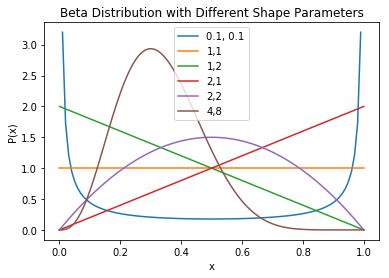

In [64]:
rate_pairs = [
    ([0.1, 0.1], "0.1, 0.1"),
    ([1, 1], "1,1"),
    ([1, 2], "1,2"),
    ([2, 1], "2,1"),
    ([2, 2], "2,2"),
    ([4, 8], "4,8"),
]
x = np.linspace(0, 1, 100)
legend_entries = list(map(lambda  r: r[1], rate_pairs))
for (a, b), _ in rate_pairs:
    plt.plot(x, beta.pdf(x, a=a, b=b))
plt.xlabel('x'); plt.ylabel('P(x)');
plt.title('Beta Distribution with Different Shape Parameters')
plt.legend(legend_entries)

# The Pareto Distribution
The Pareto distribution is used to model long/heavy tails.

$$
Pareto(x|k,m) = k m^k x^{-(k+1)} I(x \ge m)
$$

$$
\begin{align}
mean &= \frac {km} {k-1}\ if\ k>1 \\
mode &= m \\
var  &= \frac {m^2 k} {{(k-1)}^2 (k-2)} if k>2
\end{align}
$$